# 01. Data Exploration

This notebook demonstrates how to load Hi-C data using `cooler` and visualize the contact matrix.

In [4]:
import cooler
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

# Add src to path to import local modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.loaders import get_cooler

## 1. Load Data

We load the HFF Micro-C test data (or GM12878 if available) using our helper function.

In [5]:
# Replace with your actual file path
# Using the 'test.mcool' loaded by get_cooler (loads from data/raw automatically)
filename = 'test.mcool'
# If you downloaded the gold standard: filename = '4DNFI1UEG1O1.mcool'

# Example for mcool at 100kb resolution
try:
    c = get_cooler(filename, resolution=100000)
    print(f"Loaded: {c}")
    print(f"Chromosomes: {c.chromnames}")
    print(f"Total Bins: {c.bins().shape}")
except FileNotFoundError:
    print("File not found. Please run notebooks/00_fetch_data.py to download test data.")

Loaded: <Cooler "test.mcool::/resolutions/100000">
Chromosomes: ['chr2', 'chr17']
Total Bins: (3255,)


## 2. Visualize Contact Map

We visualize the contact matrix. We look for 'chr17' (contains TP53) if available, otherwise default to the first chromosome.

Visualizing chr17...


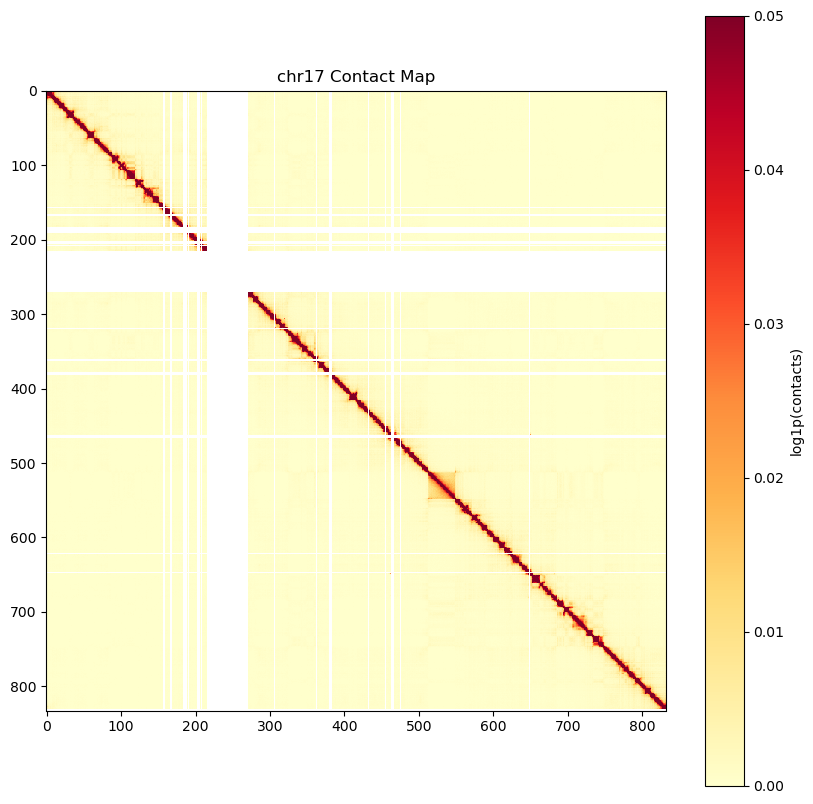

In [6]:
if 'c' in locals():
    # Fetch a matrix for a specific region (e.g., chr17)
    # balance=True applies normalization (crucial for valid analysis)
    # We try chr17 first, if not present (test data might be partial), fall back to first chrom
    target_chrom = 'chr17' if 'chr17' in c.chromnames else c.chromnames[0]
    print(f"Visualizing {target_chrom}...")
    
    try:
        matrix = c.matrix(balance=True).fetch(target_chrom)

        plt.figure(figsize=(10, 10))
        plt.imshow(np.log1p(matrix), cmap='YlOrRd', interpolation='none', vmax=0.05)
        plt.colorbar(label='log1p(contacts)')
        plt.title(f"{target_chrom} Contact Map")
        plt.show()
    except Exception as e:
        print(f"Error fetching matrix: {e}")